In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML

In [110]:
heart_prev = pd.read_csv("heart_disease.csv")
heart_prev.drop("Unnamed: 0", axis=1, inplace=True)
display(heart_prev.head())
display(heart_prev.info())

,Zip Code,Smoking Prevalence,Hypertension Prevalence,Obesity Prevalence,Sedentarism Prevalence,Cholesterol Prevalence,Diabetes Prevalence,Heart Disease Prevalence,Restaurant Count,median_household_income,Population,Population Group,Restaurant Group
0,1101,28.300000,36.400000,44.000000,46.600000,41.300000,19.300000,9.300000,2.0,NaN,NaN,NaN,NaN
1,1104,24.269272,33.257045,37.437441,37.721353,38.392990,14.837576,8.816472,5.0,32273.0,22865.0,20000-40000,0-7
2,1105,28.596151,32.879892,42.176132,43.694299,37.409454,15.840128,7.849705,4.0,18402.0,12350.0,<20000,0-7
3,1107,25.495498,31.912761,41.052003,44.608772,38.631033,16.712049,8.234889,0.0,21737.0,11611.0,<20000,0-7
4,1108,23.844497,30.236068,35.381122,34.251449,35.500119,12.581968,6.943035,2.0,34064.0,26688.0,20000-40000,0-7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4793 entries, 0 to 4792
Data columns (total 13 columns):
Zip Code                    4793 non-null int64
Smoking Prevalence          4793 non-null float64
Hypertension Prevalence     4793 non-null float64
Obesity Prevalence          4793 non-null float64
Sedentarism Prevalence      4793 non-null float64
Cholesterol Prevalence      4793 non-null float64
Diabetes Prevalence         4793 non-null float64
Heart Disease Prevalence    4793 non-null float64
Restaurant Count            4793 non-null float64
median_household_income     4396 non-null float64
Population                  4396 non-null float64
Population Group            4396 non-null object
Restaurant Group            4396 non-null object
dtypes: float64(10), int64(1), object(2)
memory usage: 486.9+ KB


None

# In-depth Analysis

The data is split into the target variable, heart disease prevalence (y), and its features (X).

We will use various untuned supervised learning estimators to see which works best by default. We will then tune the top-performing estimators. The metric used for performance will be RMSE and 5-fold cross-validation with be performed.

Training will be performed using 80% of the data, and 20% will be reserved for final evaluation of the model.

In [111]:
# Import split, cross validation, imputer and pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline

# Select features and target variable
X = heart_prev.drop(columns=["Zip Code", "Heart Disease Prevalence","Restaurant Count",
                     "Population Group","Restaurant Group"])
y = heart_prev[["Heart Disease Prevalence"]]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Set an imputer to fill missing values with the mean of the column
imp = Imputer(missing_values="NaN", strategy="mean", axis=0)

### Linear Regression

In [113]:
from sklearn.linear_model import LinearRegression

est = LinearRegression()
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores = dict()
scores["Linear Regression"] = np.mean(cv_scores)

print("Linear Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Linear Regression"])

Linear Regression cross validation scores:
0.7640016006457047
0.6163916169187618
0.7173613585882983
0.6456242575199426
0.5999236046388227

Average Score on 5-Folds:  0.6686604876623059


### Lasso Regression

In [114]:
from sklearn.linear_model import Lasso

est = Lasso(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Lasso Regression"] = np.mean(cv_scores)

print("Lasso Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Lasso Regression"])

Lasso Regression cross validation scores:
0.8907985229596319
0.6856086049982979
0.8412855240670011
0.7146179925453434
0.6835626169733959

Average Score on 5-Folds:  0.763174652308734


### Ridge Regressor

In [115]:
from sklearn.linear_model import Ridge

est = Ridge(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Ridge Regression"] = np.mean(cv_scores)

print("Ridge Regression cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Ridge Regression"])

Ridge Regression cross validation scores:
0.7640051016423385
0.6163893851233474
0.7173626213449563
0.6456231419656403
0.5999204163478955

Average Score on 5-Folds:  0.6686601332848356


### Decision Tree

In [116]:
from sklearn import tree

est = tree.DecisionTreeRegressor(max_depth=6, random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Decision Tree"] = np.mean(cv_scores)

print("Decision Tree cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Decision Tree"])

Decision Tree cross validation scores:
0.7499448129814535
0.7102485303215036
0.8044003891453831
0.6791831296908507
0.6863891261764681

Average Score on 5-Folds:  0.7260331976631318


### Random Forest

In [117]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Random Forest"] = np.mean(cv_scores)

print("Random Forest cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Random Forest"])

Random Forest cross validation scores:
0.6718676301591144
0.5682017723110987
0.6573881749276649
0.5948843181933481
0.600415530874406

Average Score on 5-Folds:  0.6185514852931264


### Adaptive Boost Regressor

In [118]:
from sklearn.ensemble import AdaBoostRegressor

est = AdaBoostRegressor(base_estimator=trees, random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["AdaBoost"] = np.mean(cv_scores)

print("AdaBoost cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["AdaBoost"])

AdaBoost cross validation scores:
0.6742929900376747
0.5871803151013911
0.7201831220092996
0.5987618312110783
0.601410061504931

Average Score on 5-Folds:  0.636365663972875


### Gradient Boost Regressor

In [119]:
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(random_state=42)
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Gradient Boost Regressor"] = np.mean(cv_scores)

print("Gradient Boost Regressor cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Gradient Boost Regressor"])

Gradient Boost Regressor cross validation scores:
0.6466555426856201
0.5635748594739578
0.6134600065917547
0.5652586211118632
0.5822141303440007

Average Score on 5-Folds:  0.5942326320414393


### Elastic Net

In [120]:
from sklearn.linear_model import ElasticNet

est = ElasticNet()
steps = [('Imputation',imp), ("Estimator",est)]
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

cv_scores= cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
cv_scores = np.sqrt(cv_scores * -1)

scores["Elastic Net"] = np.mean(cv_scores)

print("Elastic Net cross validation scores:")
for score in cv_scores:
    print(score)
    
print("\nAverage Score on 5-Folds: ", scores["Elastic Net"])

Elastic Net cross validation scores:
0.864086471141114
0.662029161647935
0.8038975340387998
0.6933738349128076
0.6612875130534176

Average Score on 5-Folds:  0.7369349029588148


### Summary of un-tuned scores

A gradient boost regressor had the best default performance at 0.594 RMSE. The random forest performed similarly well at 0.619 RMSE. Both estimators should be evaluated for improved performance through tuning.

In [121]:
scores = sorted(scores.items(), key= lambda score: score[1], reverse=False)
for k,v in scores:
    print(k,": ",v)

Gradient Boost Regressor :  0.5942326320414393
Random Forest :  0.6185514852931264
AdaBoost :  0.636365663972875
Ridge Regression :  0.6686601332848356
Linear Regression :  0.6686604876623059
Decision Tree :  0.7260331976631318
Elastic Net :  0.7369349029588148
Lasso Regression :  0.763174652308734


## Hyperparamenter Tuning

The top two performing estimators, gradient boost and random forests, will be tuned and re-evaluated using RMSE scoring.

### Tuned Gradient Boost Regression

In [122]:
from sklearn.model_selection import GridSearchCV

steps = [("Imputation",imp),("GBR", GradientBoostingRegressor(random_state=42))]
pipeline = Pipeline(steps)

params = {"GBR__n_estimators":[100, 200, 500],
          "GBR__max_depth":[3, 5]}

cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="neg_mean_squared_error")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = np.sqrt(cv.best_score_ * -1)

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
GBR__max_depth :  3
GBR__n_estimators :  500

Best score:  0.5832507906770045


### Tuned Random Forest

In [123]:
steps = [("Imputation",imp),("forest", RandomForestRegressor(random_state=42))]
pipeline = Pipeline(steps)

params = {"forest__n_estimators": [1, 5, 10, 50, 100, 200],
          "forest__max_depth": [3, 5, 7]}
 
cv = GridSearchCV(pipeline, param_grid=params, cv=5, scoring="neg_mean_squared_error")
cv.fit(X_train, y_train)

cv_param = cv.best_params_
cv_score = np.sqrt(cv.best_score_ * -1)

print("Best parameters:\n---------------")
for k,v in cv_param.items():
    print(k,": ",v)
print("\nBest score: ", cv_score)

Best parameters:
---------------
forest__max_depth :  7
forest__n_estimators :  100

Best score:  0.6134229789481772


Gradient boost regression provides the best score before and after tuning, with a final RMSE of 0.583.

## Feature importance

Now we examine which features provide the most predictive value for the model using Mutual Information scoring.

In [124]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

kbest=SelectKBest(score_func=mutual_info_regression, k=5)

steps = [("Imputation",imp),("Select K Best",kbest)]
pipeline = Pipeline(steps)

pipeline.fit(X, y)

feature_names = X.columns
feature_scores = list(zip(feature_names, kbest.scores_))

feature_scores.sort(key=lambda x:x[1], reverse=True)

for f,s in feature_scores[:10]:
    print(f,": ",s*100)

Hypertension Prevalence :  90.73551393625196
Cholesterol Prevalence :  90.6619534586751
Diabetes Prevalence :  82.46411171267738
Sedentarism Prevalence :  36.33650316651522
median_household_income :  32.65051228000697
Obesity Prevalence :  28.60468874300306
Smoking Prevalence :  26.245806458804655
Population :  13.042364120066896


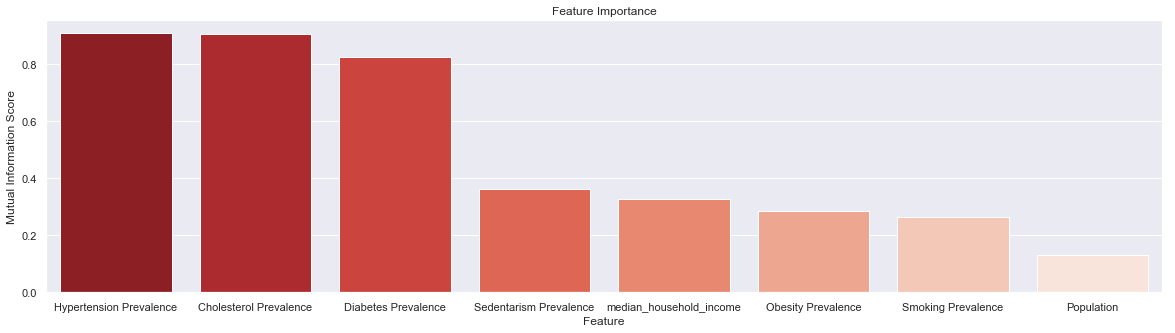

In [125]:
feature = []
score = []
for f,s in feature_scores:
    feature.append(f)
    score.append(s)
    
plt.subplots(figsize=(20,5))
plot = sns.barplot(feature, score, palette="Reds_r")
plot.set(title="Feature Importance",xlabel="Feature",ylabel="Mutual Information Score",)
plt.show()

Heart disease's well-known risk factors are the strongest predictors as expected. Median household income is approximately as strong of a predictor as well-known risk factors, smoking and obesity. Population contributes minimally to prediction.

## Final Results

The tuned gradient boost model will now be used on the test set as an evaluation of performance on unseen data.

In [126]:
gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, max_depth=3)

steps = [("Imputation",imp),("Estimator",gbr)]
pipeline = Pipeline(steps)

pipeline.fit(X_train, y_train)

y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

train_r2 = pipeline.score(X_train, y_train)
train_rmse = np.sqrt(mean_squared_error(y_train,y_pred_train))

test_r2 = pipeline.score(X_test, y_test)
test_rmse = np.sqrt(mean_squared_error(y_test,y_pred_test))


print("Training set R2: {}".format(train_r2*100))
print("Training set RMSE: {}".format(train_rmse))
print("\n")
print("Test set R2: {}".format(test_r2*100))
print("Test set RMSE: {}".format(test_rmse))

Training set R2: 94.60031133765409
Training set RMSE: 0.45124349752441806


Test set R2: 89.8154997049631
Test set RMSE: 0.5948501246661551


The model shows good R2 and RMSE scores on both the training and the test sets. This model is expected to perform well on other unseen data.

## Recommendation

The model examines the impact of two socioeconomic factors (household income and population) on disease prevalence. This model can be taken further by incorporating other socioeconomic features such distance and means of transportation to work, education levels and home values.

Additionally, the model may also provide more insight using an updated dataset for fast food restaurant locations within the US.